# TP 10 : Automates cellulaires

<center><img src=https://raw.githubusercontent.com/cpge-itc/bcpst2/main/files/9_automate_cellulaire/fire.png width=25%></center>

> Un automate cellulaire consiste en une grille (matrice) de cellules contenant chacune un état qui peut évoluer au cours du temps. L'état d'une cellule au temps $t+1$ dépend de l'état au temps $t$ des cellules adjacentes.

## Rappels sur numpy

In [1]:
import numpy as np

On peut créer une matrice de taille $n\times p$ remplie de $0$ avec `np.zeros((n,p))` :

In [ ]:
m = np.zeros((2, 4))
m

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.]])

On peut accéder et modifier l'élément sur la ligne $i$, colonne $j$ avec `m[i][j]` :

In [ ]:
m[0][0] = 1 # modifie l'élément ligne 0, colonne 0 (en haut à gauche)
m

array([[1., 0., 0., 0.],
       [0., 0., 0., 0.]])

````{admonition} Exercice
 Écrire une fonction `identite` telle que `identite(n)` renvoie une matrice identité de taille $n\times n$.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def identite(n):
    I = np.zeros((n, n))
    for i in range(n):
        I[i][i] = 1
    return I
```
````

In [ ]:
identite(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

Si `m` est une matrice, `len(m)` est son nombre de lignes et `len(m[0])` est son nombre de colonnes :

In [ ]:
print(len(m)) # nombre de lignes
print(len(m[0])) # nombre de colonnes

2
4


On peut aussi utiliser `m.shape` pour obtenir les dimensions de la matrice (sous forme de tuple) :

In [ ]:
m.shape # m est de dimension 2x4

(2, 4)

On peut parcourir une matrice avec deux boucles `for` (une boucle pour chaque indice) :

In [ ]:
for i in range(len(m)): # parcourt les lignes
    for j in range(len(m[0])): # parcourt les colonnes
        m[i][j] = i + j # modifie la matrice
m

array([[0., 1., 2., 3.],
       [1., 2., 3., 4.]])

````{admonition} Exercice
 Écrire une fonction `trace` pour calculer la trace d'une matrice, c'est-à-dire la somme des éléments sur la diagonale.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def trace(m):
    s = 0
    for i in range(len(m)):
        for j in range(len(m[0])):
            s += m[i][j]
    return s
```
````

In [ ]:
trace(identite(5))

5.0

## Fonctions utilitaires

Si `m` est une matrice, `len(m)` est son nombre de lignes et `len(m[0])` est son nombre de colonnes :

````{admonition} Question
 Écrire une fonction `bernouilli(p)` renvoyant $1$ avec une probabilité $p$ et $0$ avec une probabilité $1 - p$.  
On utilisera `np.random.rand()` pour générer un nombre aléatoire entre 0 et 1
````

````{admonition} Solution
:class: tip, dropdown
``` python
def bernouilli(p):
    if np.random.rand() < p:
        return 1
    return 0
```
````

````{admonition} Question
 Écrire une fonction `compter(L, e)` qui renvoie le nombre d'occurrences de l'élément `e` dans la liste `L`.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def compter(L, e):
    n = 0
    for x in L:
        if x == e:
            n += 1
    return n
```
````

In [4]:
compter([1, 0, 1, 1, 0, 0, 1], 1)

4

````{admonition} Question
 Écrire une fonction `matrice_aleatoire(n, p)` qui renvoie une matrice de taille $n \times n$ dont chaque élément est égal à 1 avec une probabilité $p$ et 0 sinon.  
On utilisera `np.zeros((n, n), dtype=int)` pour créer une matrice de taille $n \times n$ remplie de 0.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def matrice_aleatoire(n, p):
    M = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            if bernouilli(p):
                M[i, j] = 1
    return M
```
````

In [6]:
M = matrice_aleatoire(5, 0.2)
M

array([[0, 0, 1, 1, 1],
       [1, 0, 0, 1, 0],
       [0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0]])

````{admonition} Question
 Écrire une fonction `voisins(M, i, j)` qui renvoie la liste des $8$ voisins de la case `(i, j)` de la matrice `M`. Il s'agit donc des valeurs en position $(k, l)$ où $k \in \{i-1, i, i+1\}$, $l \in \{j-1, j, j+1\}$ et $(k, l) \neq (i, j)$. On fera attention à ne pas dépasser de la matrice.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def voisins(A, i, j) :
    n, p = A.shape
    L = []
    for k in range(i-1, i+2) :
        for l in range(j-1, j+2) :
            if 0 <= k < n and 0 <= l < p and (k != i or l != j):
                L.append(A[k, l])
    return L
```
````

In [8]:
voisins(M, 3, 1)

[0, 1, 1, 1, 1, 0, 0, 0]

## Jeu de la vie

Le jeu de la vie a été inventé par le mathématicien John Conway en 1970, et peut être vu comme la modélisation d'une population de cellules biologiques.  
À chaque étape, une cellule peut être en vie ($1$) ou morte ($0$), avec les règles suivantes :  
- Une cellule morte possédant exactement trois cellules voisines vivantes devient vivante (elle naît).  
- Une cellule vivante possédant deux ou trois cellules voisines vivantes le reste, sinon elle meurt.

````{admonition} Question
 Écrire une fonction `regle_jeu_vie(M, i, j)` qui renvoie l'état de la cellule `(i, j)` à l'étape suivante. On pourra réutiliser les fonctions `voisins` et `compter` écrites précédemment.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def regle_jeu_vie(A, i, j):
    n = compter(voisins(A, i, j), 1)
    if A[i, j] == 1:
        if n == 2 or n == 3:
            return 1
        return 0
    if n == 3:
        return 1
    return 0
```
````

In [10]:
print(regle_jeu_vie(M, 3, 1))
print(regle_jeu_vie(M, 2, 2))

0
0


````{admonition} Question
 Écrire une fonction `etape_jeu_vie(M)` qui renvoie la matrice correspondant à l'étape suivante du jeu de la vie.  
Attention : il ne faut pas modifier `M`, mais renvoyer une nouvelle matrice.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def etape_jeu_vie(M):
    n, p = M.shape
    B = np.zeros((n, p), dtype=int)
    for i in range(n):
        for j in range(p):
            B[i, j] = regle_jeu_vie(M, i, j)
    return B
```
````

````{admonition} Question
 Utiliser la fonction `jeu_vie` ci-dessous pour afficher l'évolution du jeu de la vie, en utilisant sa documentation.  
Remarque : si vous avez des problèmes après avoir fermé la fenêtre graphique, cliquer sur le bouton "Arrêter l'exécution" (en haut à droite dans Pyzo).
````

In [19]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def jeu_vie(M, n):
    """Affiche les n premières étapes du jeu de la vie.
    M : matrice initiale
    etape_jeu_vie : fonction qui calcule l'étape suivante
    n : nombre d'étapes
    """
    fig = plt.figure()
    def update(i) :
        nonlocal M
        plt.imshow(M, interpolation='nearest', origin='lower', cmap="gray")
        plt.title(f"Itération {i}")
        if i != 0:
            M = etape_jeu_vie(M)
    plt.axis('off')
    anim = FuncAnimation(fig, update, frames=n, interval=300, repeat=False)
    plt.show()
    # return HTML(anim.to_jshtml())

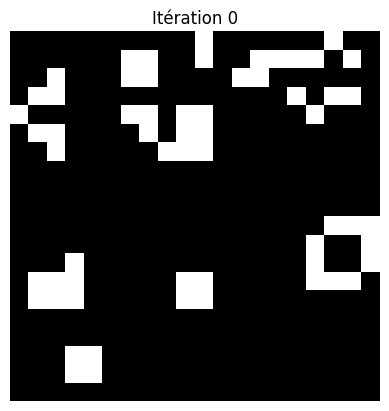

In [20]:
jeu_vie(matrice_aleatoire(20, 0.5), 30)

## Feu de forêt

Nous souhaitons ici modéliser un feu de forêt. Chaque case de la matrice correspondra à un arbre qui peut prendre l'une des valeurs suivantes :
- $0$ : arbre non brûlé.
- $-1$ : arbre complètement brûlé.
- un entier $t \in \mathbb{N}^*$ : arbre en train de brûler, où $t$ est le nombre d'étapes restantes avant que l'arbre ne soit complètement brûlé.

````{admonition} Question
 Écrire une fonction `voisin_brule(M, i, j)` qui renvoie `True` si la case `(i, j)` de la matrice `M` est adjacente à au moins une case contenant un arbre en train de brûler et `False` sinon.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def voisin_brule(A, i, j) :
    L = voisins(A, i, j)
    for e in L:
        if e > 0:
            return True
    return False
```
````

À chaque étape :  
- Une case contenant un entier $t > 1$ devient $t-1$ (arbre en train de brûler).  
- Une case contenant $1$ devient $-1$ (arbre complètement brûlé).  
- Une case contenant $0$ qui est adjacente à au moins une case contenant $1$ devient $3$ avec une probabilité $p$ (un arbre qui prend feu brûle pendant $3$ tours). Sinon, cette case reste à $0$.

````{admonition} Question
 Écrire une fonction `regle_feu(M, i, j, p)` qui renvoie l'état de la case `(i, j)` à l'étape suivante, où `p` est la probabilité ci-dessus.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def regle_feu(M, i, j, p):
    e = M[i, j]
    if e > 1:
        return e - 1
    if e == 1 or e == -1:
        return -1
    if voisin_brule(M, i, j) and bernouilli(p) == 1:
        return 3
    return 0
```
````

````{admonition} Question
 Écrire une fonction `etape_feu(M, p)` qui renvoie la matrice correspondant à l'étape suivante du feu de forêt. Attention : il ne faut pas modifier `M`, mais renvoyer une nouvelle matrice.
````

````{admonition} Solution
:class: tip, dropdown
``` python
def etape_feu(M, p):
    n = len(M)
    B = np.zeros((n, n), dtype=int)
    for i in range(n):
        for j in range(n):
            B[i, j] = regle_feu(M, i, j, p)
    return B
```
````

````{admonition} Question
 Utiliser la fonction `feu_foret` ci-dessous pour afficher l'évolution d'un feu de forêt, en utilisant sa documentation. Tester avec différentes probabilités de propagation du feu, en changeant la position du premier arbre en feu...
````

In [17]:
def feu_foret(M, n, p):
    """Affiche les n premières étapes du jeu de la vie.
    M : matrice initiale
    etape_jeu_vie : fonction qui calcule l'étape suivante
    n : nombre d'étapes
    """
    fig = mpl.pyplot.figure()
    cmap = mpl.colors.ListedColormap(['black', 'green', 'red'])
    bounds = [-1,-0.5, 0.5, 1]
    norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
    def update (i) :
        nonlocal M
        mpl.pyplot.imshow(M, interpolation='nearest', origin='lower', cmap=cmap, norm=norm)
        mpl.pyplot.title(f"Itération {i}")
        if i != 0:
            M = etape_feu(M, p)
    mpl.pyplot.axis('off')
    anim = FuncAnimation(fig, update, frames=n, interval=300, repeat=False)
    plt.show()
    #return HTML(anim.to_jshtml())

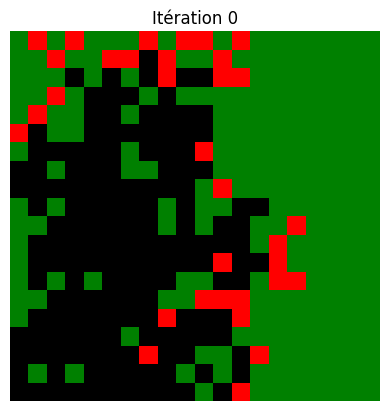

In [18]:
M = np.zeros((20, 20), dtype=int)
M[5][5] = 3 # un arbre en feu initialement
feu_foret(M, 30, 0.15)